In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv(r"C:\Users\USER\Downloads\archive (2)\netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [12]:
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      8807 non-null   object
 3   cast          8807 non-null   object
 4   country       8807 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [13]:
print (df.columns)

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [14]:
#Drop Neccesarry Column
df.columns = df.columns.str.strip()
df.drop(columns=['show_id'], inplace=True, errors='ignore')




In [15]:
print (df.columns)

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [16]:
if 'show_id' in df.columns:
    df.drop('show_id', axis=1, inplace=True)
else:
    print("Column not found")


Column not found


In [17]:
#Handle Missing Value
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [24]:
#Convert Data Column
df['date_added'] = pd.to_datetime(
    df['date_added'].astype(str).str.strip(),
    errors='coerce'
)


In [23]:
df['year_added'] = df['date_added'].dt.year


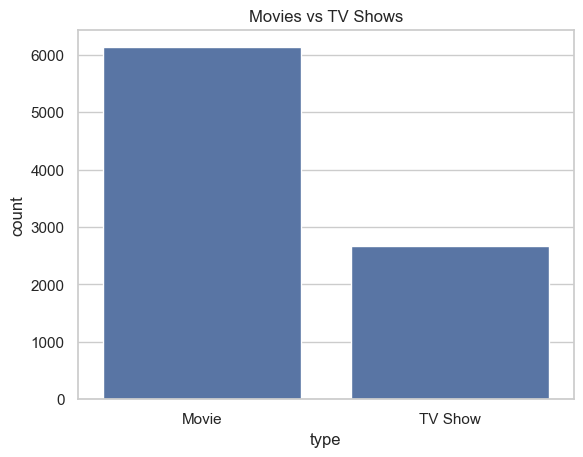

In [25]:
#Perform The EDA
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows")
plt.show()


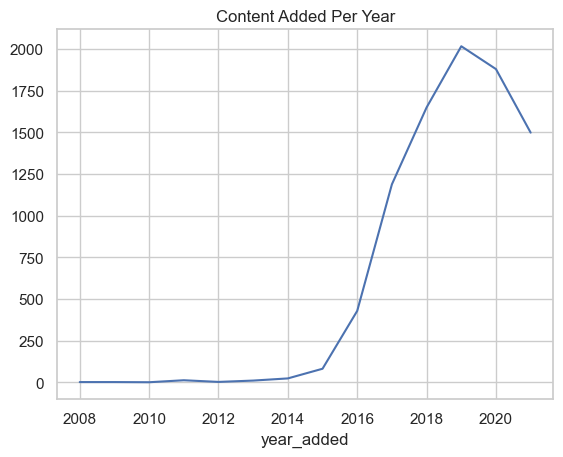

In [26]:
#Content Added Per Year
df['year_added'].value_counts().sort_index().plot(kind='line')
plt.title("Content Added Per Year")
plt.show()


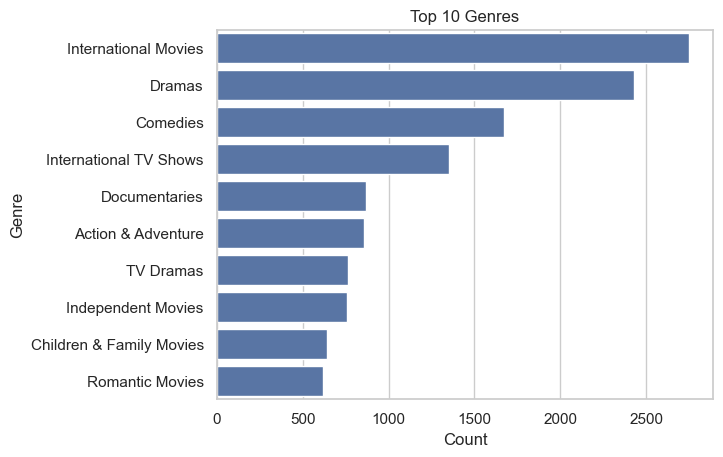

In [27]:
#TOP 10 Genres
from collections import Counter

genres = df['listed_in'].str.split(', ')
flat_list = [item for sublist in genres for item in sublist]
top_genres = Counter(flat_list).most_common(10)

genre_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

sns.barplot(x='Count', y='Genre', data=genre_df)
plt.title("Top 10 Genres")
plt.show()


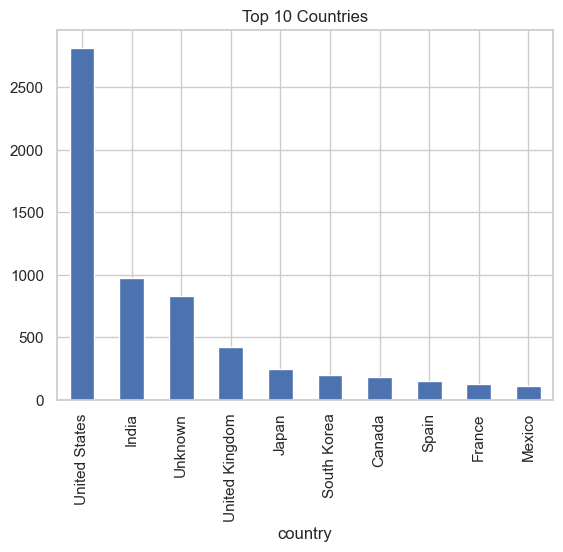

In [28]:
#Top 10 Countries
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries")
plt.show()


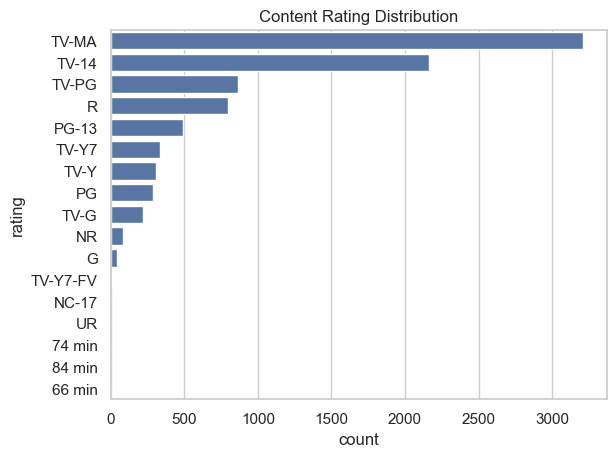

In [29]:
#Rating Distribution
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Content Rating Distribution")
plt.show()


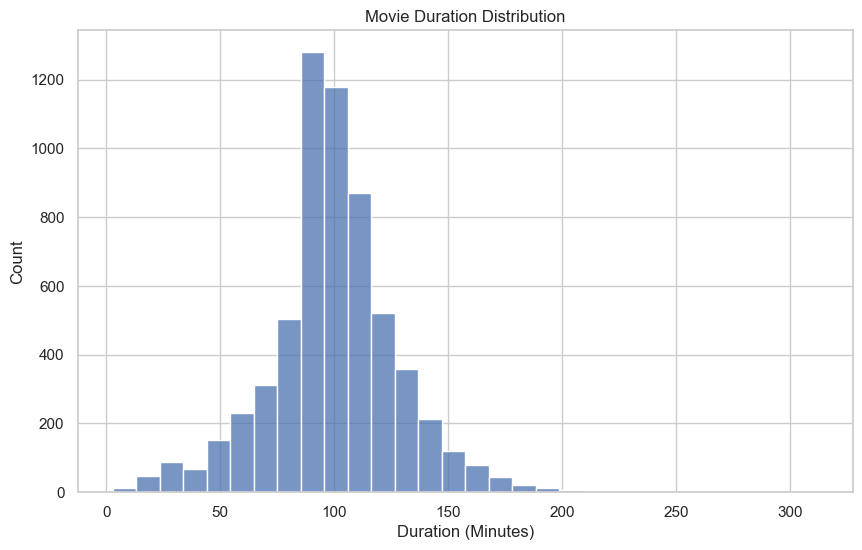

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only Movies
movies = df[df['type'] == 'Movie'].copy()

# Clean duration column
movies['duration'] = (
    movies['duration']
    .str.replace(" min", "", regex=False)
)

movies['duration'] = pd.to_numeric(movies['duration'], errors='coerce')

# Drop NaN values
movies = movies.dropna(subset=['duration'])

# Plot
plt.figure(figsize=(10,6))
sns.histplot(movies['duration'], bins=30)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()

